### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [33]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf 

yf.pdr_override()

df = pdr.get_data_yahoo("TATASTEEL.NS", start = '2022-01-01', end = '2023-05-06')

[*********************100%***********************]  1 of 1 completed


In [34]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,111.500000,115.099998,111.500000,114.245003,50.783611,38658030
2022-01-04,115.300003,115.970001,113.650002,114.879997,51.065880,59757310
2022-01-05,114.699997,118.080002,114.125000,117.760002,52.346085,61861760
2022-01-06,117.199997,118.300003,115.555000,116.324997,51.708202,53354000
2022-01-07,116.519997,117.400002,114.785004,116.035004,51.579296,39738570
...,...,...,...,...,...,...
2023-04-28,107.800003,108.500000,107.300003,107.949997,107.949997,30072920
2023-05-02,108.000000,110.849998,108.000000,110.300003,110.300003,52822162
2023-05-03,109.800003,111.000000,108.750000,109.699997,109.699997,51272624


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,111.500000,115.099998,111.500000,114.245003,50.783611,38658030
2022-01-04,115.300003,115.970001,113.650002,114.879997,51.065876,59757310
2022-01-05,114.699997,118.080002,114.125000,117.760002,52.346085,61861760
2022-01-06,117.199997,118.300003,115.555000,116.324997,51.708202,53354000
2022-01-07,116.519997,117.400002,114.785004,116.035004,51.579296,39738570


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,107.800003,108.500000,107.300003,107.949997,107.949997,30072920
2023-05-02,108.000000,110.849998,108.000000,110.300003,110.300003,52822162
2023-05-03,109.800003,111.000000,108.750000,109.699997,109.699997,51272624
2023-05-04,110.000000,111.900002,109.500000,111.050003,111.050003,38636907
2023-05-05,110.849998,110.849998,108.400002,108.650002,108.650002,32958346


In [35]:
df1=df.reset_index()['Close']

In [6]:
df1

0      114.245003
1      114.879997
2      117.760002
3      116.324997
4      116.035004
          ...    
326    107.949997
327    110.300003
328    109.699997
329    111.050003
330    108.650002
Name: Close, Length: 331, dtype: float64

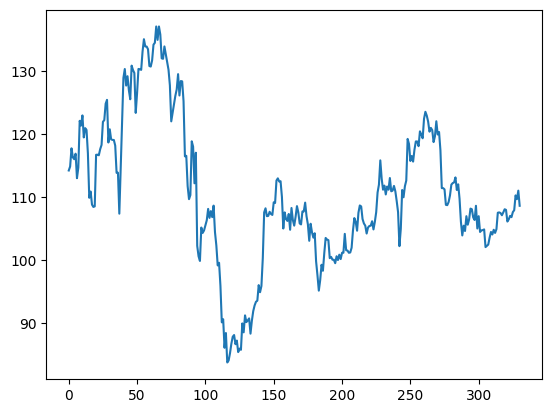

In [36]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [37]:
import numpy as np

In [9]:
df1

0      114.245003
1      114.879997
2      117.760002
3      116.324997
4      116.035004
          ...    
326    107.949997
327    110.300003
328    109.699997
329    111.050003
330    108.650002
Name: Close, Length: 331, dtype: float64

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [39]:
print(df1)

[[0.57138845]
 [0.58330987]
 [0.63737924]
 [0.61043837]
 [0.60499402]
 [0.62132736]
 [0.54848408]
 [0.58030609]
 [0.71914016]
 [0.7049658 ]
 [0.73528586]
 [0.66976445]
 [0.69745615]
 [0.69201166]
 [0.62254772]
 [0.49019057]
 [0.50877699]
 [0.46982074]
 [0.46287429]
 [0.46456403]
 [0.6181358 ]
 [0.6184174 ]
 [0.6167278 ]
 [0.63493852]
 [0.64751724]
 [0.71623021]
 [0.7213931 ]
 [0.77020561]
 [0.7816578 ]
 [0.65474515]
 [0.693983  ]
 [0.66403836]
 [0.66244258]
 [0.66216098]
 [0.64535812]
 [0.56434817]
 [0.56491137]
 [0.44288002]
 [0.57683294]
 [0.71838918]
 [0.84717921]
 [0.87336909]
 [0.82418102]
 [0.85196668]
 [0.8099127 ]
 [0.78334754]
 [0.88350696]
 [0.87036518]
 [0.86154135]
 [0.74279551]
 [0.80193381]
 [0.87365069]
 [0.87271193]
 [0.87092838]
 [0.92537331]
 [0.96207633]
 [0.94029864]
 [0.94029864]
 [0.93222565]
 [0.8822866 ]
 [0.88069096]
 [0.89927738]
 [0.94583696]
 [0.95146923]
 [1.        ]
 [0.96010513]
 [1.        ]
 [0.97587527]
 [0.90519097]
 [0.90378297]
 [0.94058024]
 [0.91

In [41]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [42]:
training_size,test_size

(215, 116)

In [43]:
train_data

array([[0.57138845],
       [0.58330987],
       [0.63737924],
       [0.61043837],
       [0.60499402],
       [0.62132736],
       [0.54848408],
       [0.58030609],
       [0.71914016],
       [0.7049658 ],
       [0.73528586],
       [0.66976445],
       [0.69745615],
       [0.69201166],
       [0.62254772],
       [0.49019057],
       [0.50877699],
       [0.46982074],
       [0.46287429],
       [0.46456403],
       [0.6181358 ],
       [0.6184174 ],
       [0.6167278 ],
       [0.63493852],
       [0.64751724],
       [0.71623021],
       [0.7213931 ],
       [0.77020561],
       [0.7816578 ],
       [0.65474515],
       [0.693983  ],
       [0.66403836],
       [0.66244258],
       [0.66216098],
       [0.64535812],
       [0.56434817],
       [0.56491137],
       [0.44288002],
       [0.57683294],
       [0.71838918],
       [0.84717921],
       [0.87336909],
       [0.82418102],
       [0.85196668],
       [0.8099127 ],
       [0.78334754],
       [0.88350696],
       [0.870

In [44]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [45]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(ytest)

[0.40627053 0.40720929 0.42035107 0.39594488 0.41847369 0.44757353
 0.50577307 0.52924064 0.60152072 0.54707594 0.51422134 0.5264245
 0.5001408  0.52360837 0.51422134 0.54895346 0.50952783 0.51140535
 0.52548589 0.50952783 0.48042813 0.44757353 0.34619361 0.39782226
 0.51328272 0.49169253 0.52454713 0.54144381 0.66535254 0.65033324
 0.59964335 0.61466265 0.59776597 0.6334367  0.65784289 0.65784289
 0.64376235 0.68788134 0.67849432 0.66722991 0.72542945 0.74608103
 0.73481648 0.71698119 0.68694273 0.69820713 0.69163624 0.65596551
 0.6738008  0.71791995 0.67849432 0.68600397 0.63155918 0.51891485
 0.51891485 0.5151601  0.46916372 0.46822496 0.47761199 0.49732481
 0.52924064 0.53393416 0.53581153 0.55083083 0.51328272 0.5301794
 0.48699902 0.41847369 0.37810945 0.40720929 0.39125137 0.43537037
 0.41002542 0.42598334 0.45789918 0.4560218  0.43161562 0.42410597
 0.46634759 0.39876102 0.43537037 0.38843523 0.39312875 0.39406751
 0.39594488 0.34337747 0.34713237 0.35088712 0.37153856 0.388435

In [46]:
print(X_train.shape), print(y_train.shape)

(209, 5)
(209,)


(None, None)

In [48]:
print(X_test.shape), print(ytest.shape)

(110, 5)
(110,)


(None, None)

In [49]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [50]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 11s 462ms/step - loss: 0.2883 - val_loss: 0.1980
Epoch 2/100
4/4 [==============================] - 0s 30ms/step - loss: 0.2199 - val_loss: 0.1276
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 0.1406 - val_loss: 0.0492
Epoch 4/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0530 - val_loss: 0.0053
Epoch 5/100
4/4 [==============================] - 0s 32ms/step - loss: 0.0322 - val_loss: 0.0427
Epoch 6/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0498 - val_loss: 0.0134
Epoch 7/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0255 - val_loss: 0.0056
Epoch 8/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0256 - val_loss: 0.0093
Epoch 9/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0275 - val_loss: 0.0067
Epoch 10/100
4/4 [==============================] - 0s 31ms/step - loss: 0.0221 - val_loss: 0.0044
Epoch 11/100
4/4 

In [53]:
import tensorflow as tf

In [54]:
tf.__version__

'2.12.0-rc1'

In [55]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4/4 [==============================] - 0s 8ms/step


In [56]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [57]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.09268107781848729

In [58]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.059705472582859354

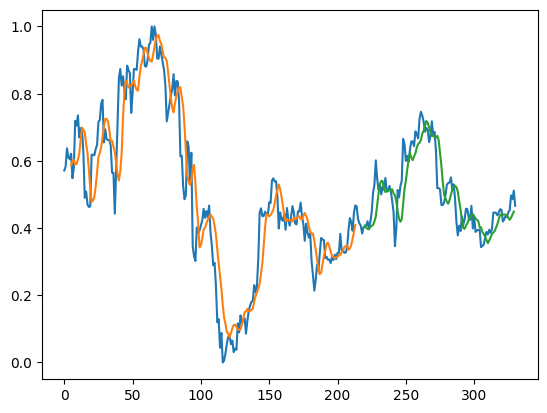

In [59]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
len(test_data)

116

In [61]:
x_input=test_data[111:].reshape(1,-1)
x_input.shape


(1, 5)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.4532056634987933,
 0.49732480609606755,
 0.486060258825046,
 0.5114053469501756,
 0.46634758757009553]

In [64]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<10):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.43942821 0.43806928 0.43674597 0.43544921 0.43417019]
0 day output [[0.43291065]]
1 day input [0.43806928 0.43674597 0.43544921 0.43417019 0.43291065]
1 day output [[0.43167427]]
2 day input [0.43674597 0.43544921 0.43417019 0.43291065 0.43167427]
2 day output [[0.43046284]]
3 day input [0.43544921 0.43417019 0.43291065 0.43167427 0.43046284]
3 day output [[0.4292726]]
4 day input [0.43417019 0.43291065 0.43167427 0.43046284 0.42927259]
4 day output [[0.4281023]]
5 day input [0.43291065 0.43167427 0.43046284 0.42927259 0.42810231]
5 day output [[0.4269531]]
6 day input [0.43167427 0.43046284 0.42927259 0.42810231 0.42695311]
6 day output [[0.42582563]]
7 day input [0.43046284 0.42927259 0.42810231 0.42695311 0.42582563]
7 day output [[0.42471918]]
8 day input [0.42927259 0.42810231 0.42695311 0.42582563 0.42471918]
8 day output [[0.42363295]]
9 day input [0.42810231 0.42695311 0.42582563 0.42471918 0.42363295]
9 day output [[0.4225664]]
[[0.43291065096855164], [0.4316742

In [65]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)
day_new = np.arange(1, 6)
day_pred = np.arange(6, 16)

In [66]:
import matplotlib.pyplot as plt

In [67]:
len(df1)

331

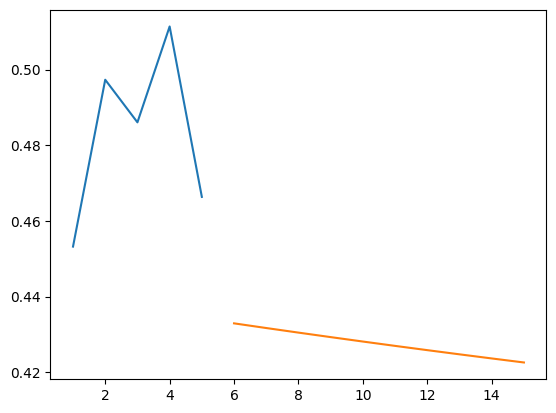

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[326:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

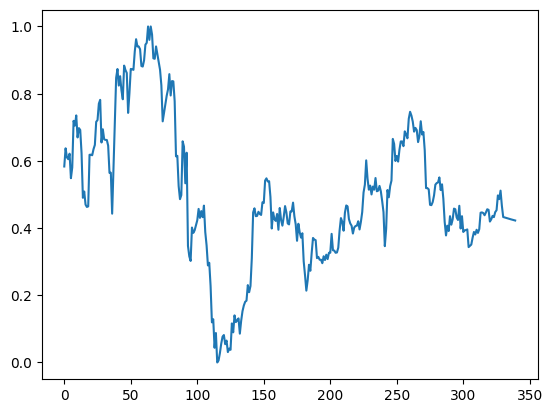

In [70]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [71]:
df3=scaler.inverse_transform(df3).tolist()

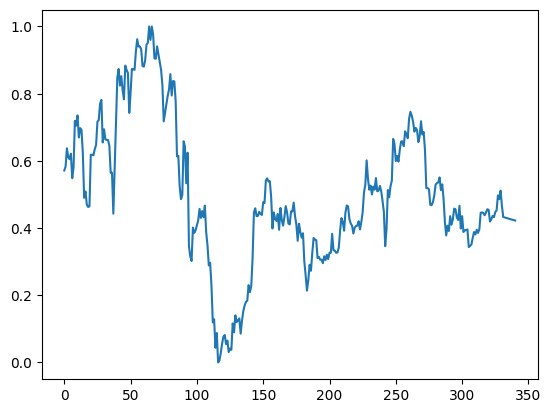

In [72]:
plt.plot(df3)